In [1]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.naive_bayes import GaussianNB 
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyClassifier

In [2]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
shopping = pd.read_csv('./online_shoppers_intention.csv')
shopping.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
shopping.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [5]:
nullcount = shopping.isnull().sum()
print('nullcount in the data : ', nullcount.sum())

nullcount in the data :  0


In [6]:
uniques = shopping.nunique()
uniques

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


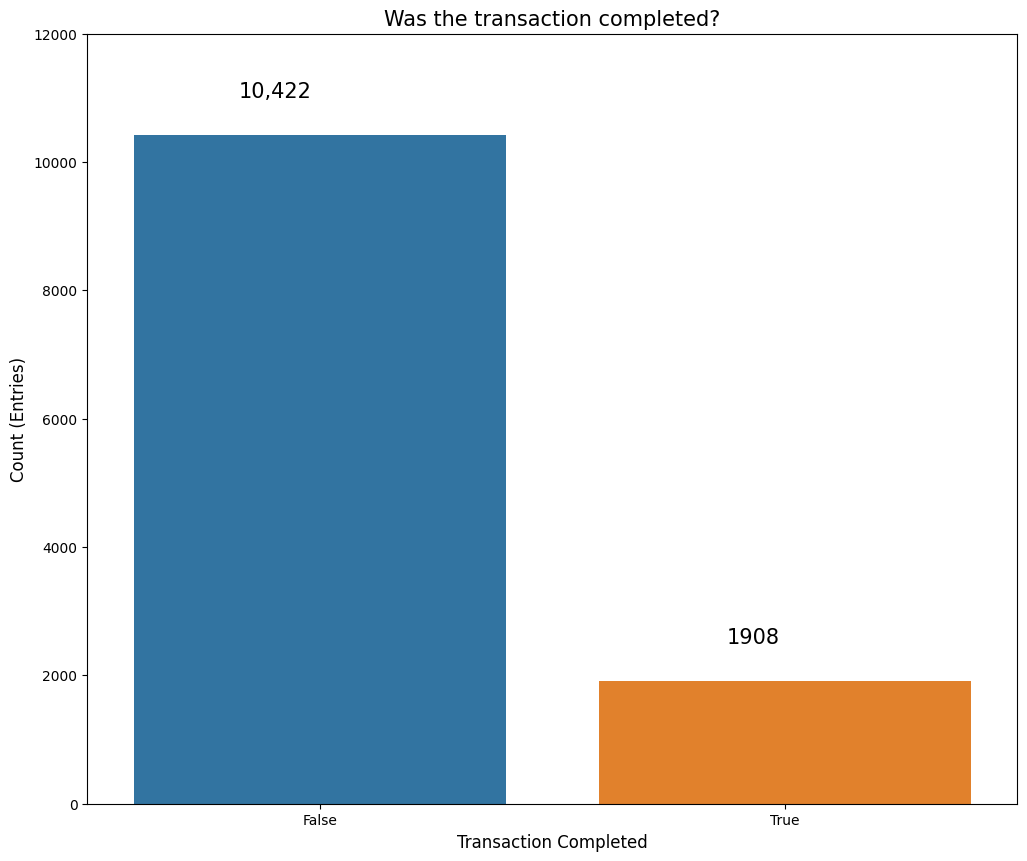

In [7]:
# Visualize the data
sns.countplot(shopping['Revenue'])
plt.ylim(0,12000)
plt.title('Was the transaction completed?', fontsize= 15)
plt.xlabel('Transaction Completed', fontsize=12)
plt.ylabel('Count (Entries)', fontsize=12)
plt.text(x=-.175, y=11000 ,s='10,422', fontsize=15)
plt.text(x=.875, y=2500, s='1908', fontsize=15)
plt.show()

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


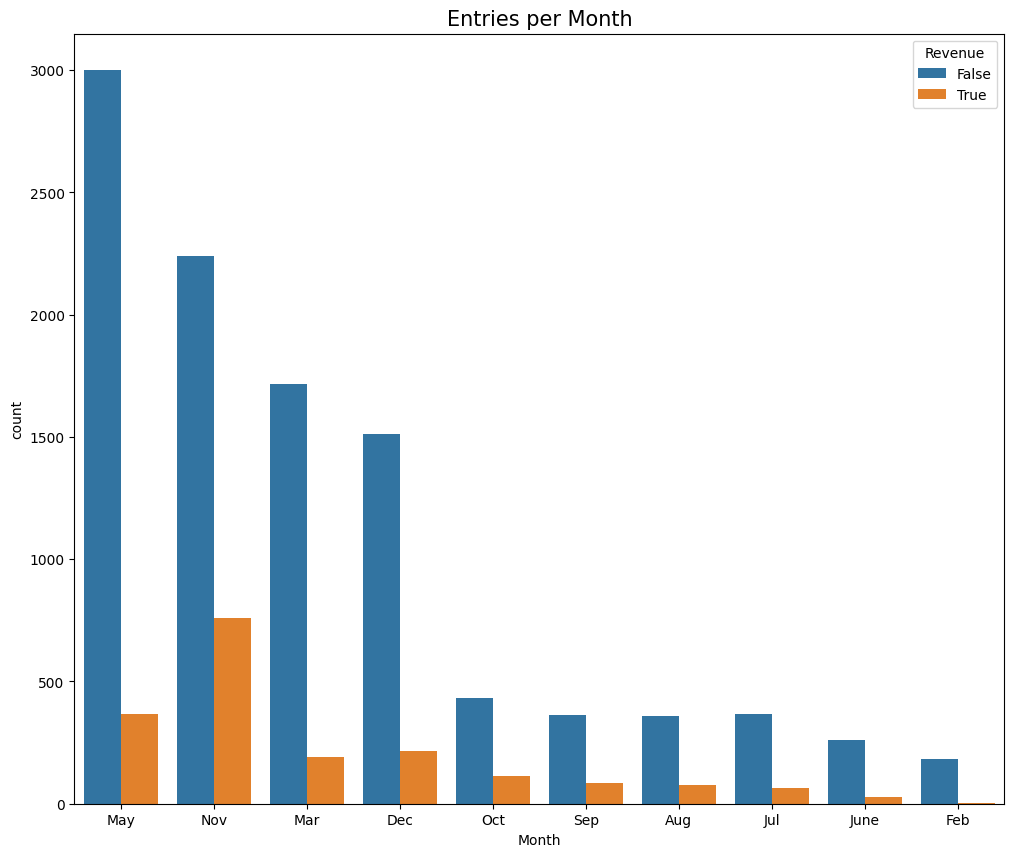

In [8]:
monthly = shopping['Month'].value_counts()
sns.countplot(shopping['Month'], order=monthly.index, hue=shopping['Revenue'])
plt.title('Entries per Month', fontsize=15)
xval = -.42
#plt.ylim(0,3200)

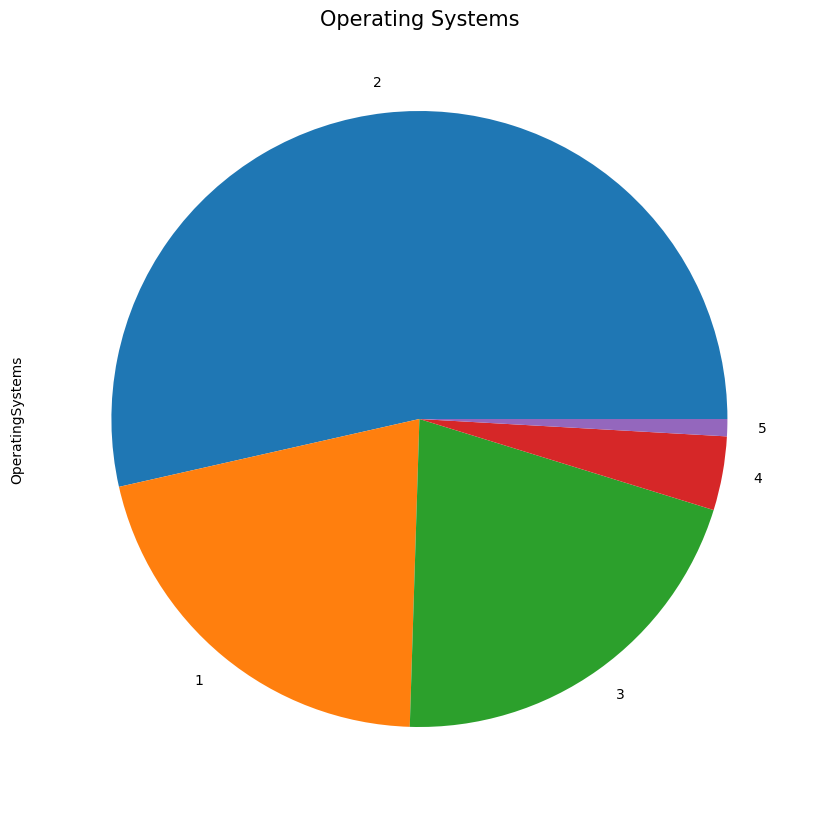

In [9]:
shopping['OperatingSystems'] = shopping['OperatingSystems'].replace([5,6,7,8], 5)
os_plot = shopping['OperatingSystems'].value_counts().plot.pie()
plt.title('Operating Systems', fontsize=15)
plt.show()

C:\Users\PC\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='VisitorType', ylabel='count'>

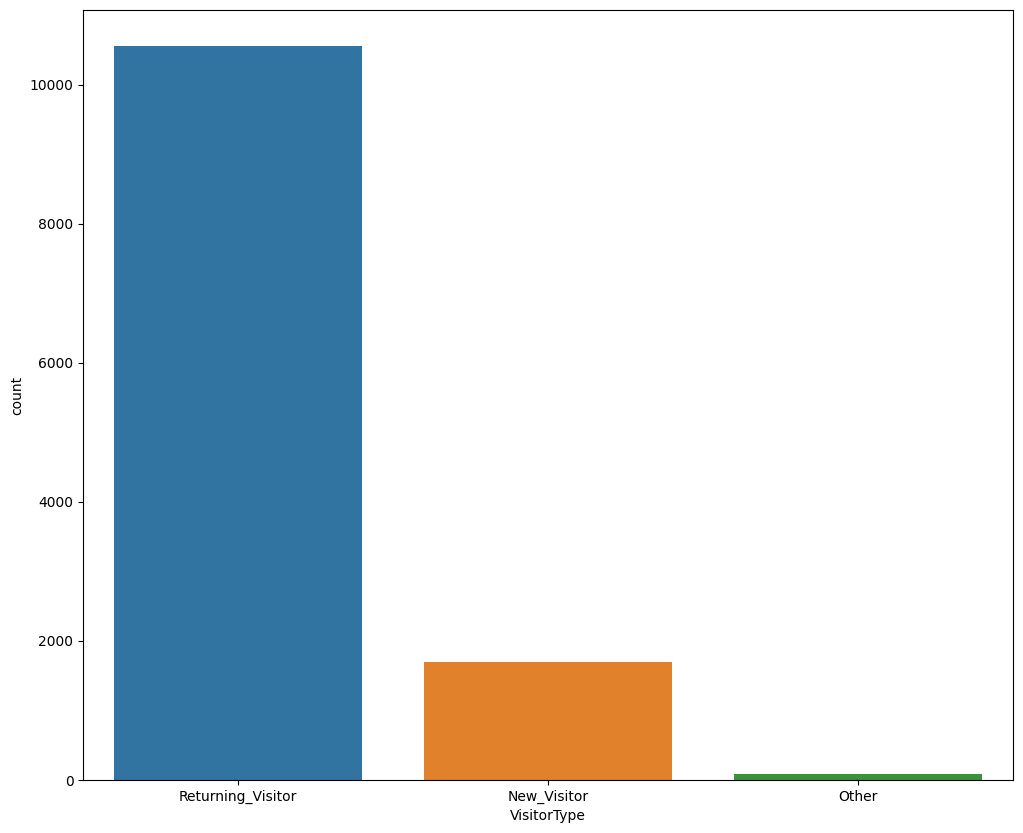

In [10]:
sns.countplot(shopping['VisitorType'])

In [11]:
shopping_clean = shopping.drop(['Month','Browser','OperatingSystems','Region','TrafficType','Weekend'], axis=1)

In [12]:
# Encoding Vistor Type

visitor_encoded = pd.get_dummies(shopping_clean['VisitorType'], prefix='Visitor_Type', drop_first = True)

shopping_clean_merged = pd.concat([shopping_clean, visitor_encoded], axis=1).drop(['VisitorType'], axis=1)

In [13]:
y = shopping_clean_merged['Revenue']
X = shopping_clean_merged.drop('Revenue', axis=1)
#X['Weekend'] = np.asarray(X['Weekend']).astype(np.float32)

In [14]:
X

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Visitor_Type_Other,Visitor_Type_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,0,1
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,0,1
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,0,1
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,0,1


In [15]:
y = np.asarray(y).astype(np.float32)

In [16]:
y

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.2)

In [18]:
y_train

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)

In [19]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
    if output_bias is not None:
        output_bias = tf.keras.initializers.Constant(output_bias)
    model = keras.Sequential([
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dense(256, activation='relu'),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(1, activation='sigmoid', bias_initializer=output_bias),
  ])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=1e-3),
        loss=keras.losses.BinaryCrossentropy(),
        metrics=metrics)

    return model

In [20]:
initial_bias = np.log(len(y_train[y_train==True]) / len(y_train))
initial_bias

-1.8454888184134868

In [21]:
EPOCHS = 100
BATCH_SIZE = 32

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=15,
    mode='max',
    restore_best_weights=True)

In [22]:
model = make_model(output_bias = initial_bias)
model.predict(X_train[:10])

1/1 [==============================] - 1s 740ms/step


array([[0.20959859],
       [1.        ],
       [0.9120978 ],
       [0.00279831],
       [0.99883825],
       [1.        ],
       [0.9843797 ],
       [0.99993145],
       [0.12215059],
       [0.99924916]], dtype=float32)

In [23]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [24]:
model = make_model()
model.load_weights(initial_weights)
history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(X_test, y_test), 
    verbose=0)

Text(0, 0.5, 'Loss')

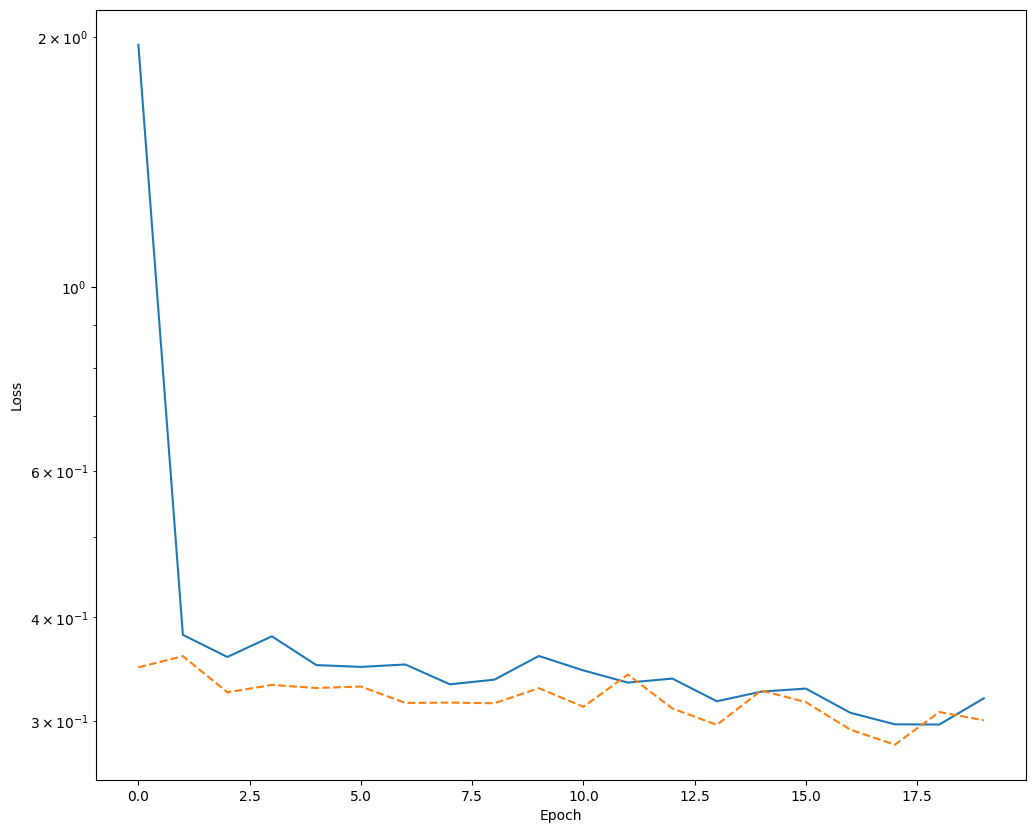

In [25]:
plt.semilogy(history.epoch, history.history['loss'])
plt.semilogy(history.epoch, history.history['val_loss'], linestyle="--")
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [26]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_test, y_test))

Epoch 1/100
309/309 [==============================] - 10s 24ms/step - loss: 1.7798 - tp: 436.0000 - fp: 694.0000 - tn: 9728.0000 - fn: 1472.0000 - accuracy: 0.8243 - precision: 0.3858 - recall: 0.2285 - auc: 0.6305 - prc: 0.2669 - val_loss: 0.4180 - val_tp: 37.0000 - val_fp: 18.0000 - val_tn: 2098.0000 - val_fn: 313.0000 - val_accuracy: 0.8658 - val_precision: 0.6727 - val_recall: 0.1057 - val_auc: 0.6788 - val_prc: 0.3780
Epoch 2/100
309/309 [==============================] - 6s 20ms/step - loss: 0.4163 - tp: 276.0000 - fp: 159.0000 - tn: 8147.0000 - fn: 1282.0000 - accuracy: 0.8539 - precision: 0.6345 - recall: 0.1772 - auc: 0.7291 - prc: 0.4125 - val_loss: 0.3436 - val_tp: 147.0000 - val_fp: 87.0000 - val_tn: 2029.0000 - val_fn: 203.0000 - val_accuracy: 0.8824 - val_precision: 0.6282 - val_recall: 0.4200 - val_auc: 0.8388 - val_prc: 0.5578
Epoch 3/100
309/309 [==============================] - 6s 21ms/step - loss: 0.3821 - tp: 264.0000 - fp: 103.0000 - tn: 8203.0000 - fn: 1294.0000

In [27]:
def plot_metrics(history):
    metrics = ['loss', 'prc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
          plt.ylim([0,1])
        plt.legend()

In [28]:
train_predictions_baseline = model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(X_test, batch_size=BATCH_SIZE)

78/78 [==============================] - 0s 3ms/step


In [29]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.2733469307422638
tp :  170.0
fp :  83.0
tn :  2033.0
fn :  180.0
accuracy :  0.8933495283126831
precision :  0.6719367504119873
recall :  0.48571428656578064
auc :  0.8775539994239807
prc :  0.6388399004936218

Legitimate Transactions Detected (True Negatives):  2033
Legitimate Transactions Incorrectly Detected (False Positives):  83
Fraudulent Transactions Missed (False Negatives):  180
Fraudulent Transactions Detected (True Positives):  170
Total Fraudulent Transactions:  350


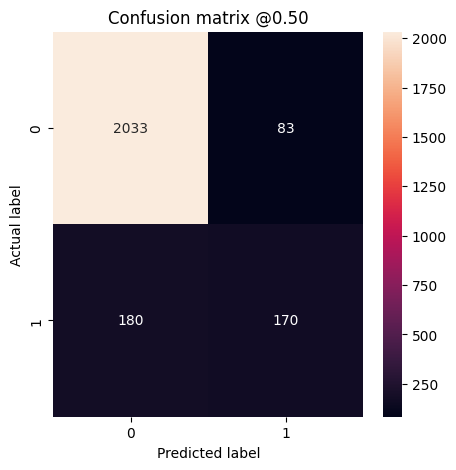

In [30]:
baseline_results = model.evaluate(X_test, y_test, batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
    print(name, ': ', value)
print()
plot_cm(y_test, test_predictions_baseline)

In [31]:
test_predictions_baseline

array([[0.00959692],
       [0.00959692],
       [0.01448098],
       ...,
       [0.05968172],
       [0.7770833 ],
       [0.35155934]], dtype=float32)

In [32]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
    roc_auc = metrics.auc(fp, tp)
    #plt.plot(fp, tp, label=name, linewidth=2, **kwargs)
    plt.plot(fp, tp, label = name+' = %0.2f' % roc_auc)


    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    #plt.xlim([-0.5,20])
    #plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

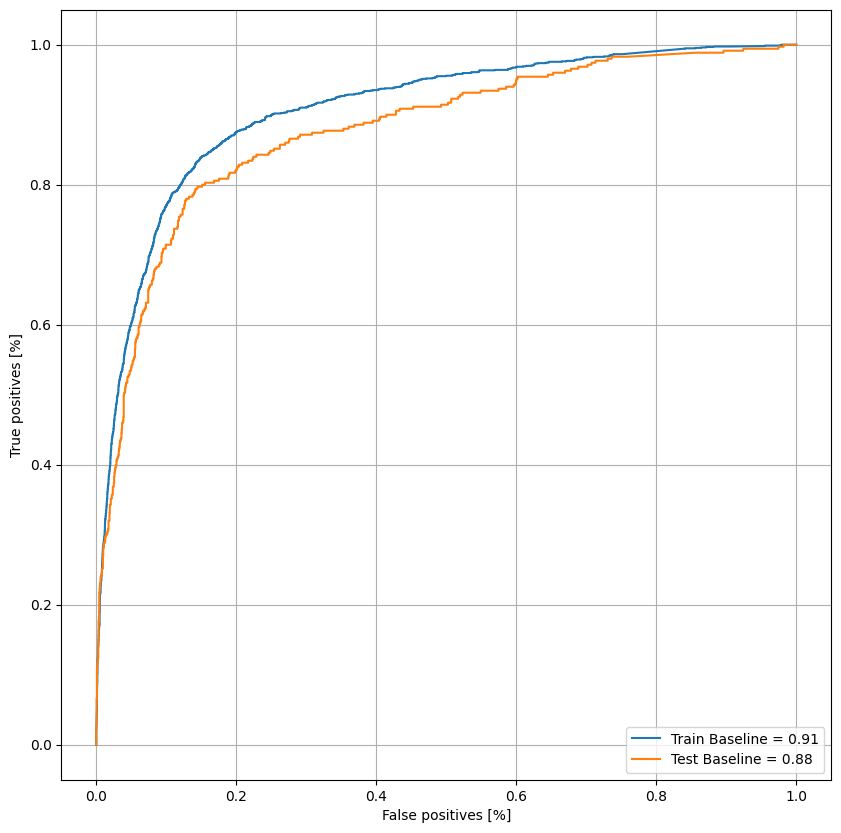

In [33]:
plot_roc("Train Baseline", y_train, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", y_test, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right');

In [34]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / len(y_train[y_train==False])) * (len(y_train) / 2.0)
weight_for_1 = (1 / len(y_train[y_train==True])) * (len(y_train) / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.59
Weight for class 1: 3.17


In [35]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(X_test, y_test),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
309/309 [==============================] - 10s 26ms/step - loss: 2.8137 - tp: 1015.0000 - fp: 2290.0000 - tn: 8132.0000 - fn: 893.0000 - accuracy: 0.7418 - precision: 0.3071 - recall: 0.5320 - auc: 0.6987 - prc: 0.2673 - val_loss: 0.5285 - val_tp: 220.0000 - val_fp: 325.0000 - val_tn: 1791.0000 - val_fn: 130.0000 - val_accuracy: 0.8155 - val_precision: 0.4037 - val_recall: 0.6286 - val_auc: 0.8222 - val_prc: 0.4423
Epoch 2/100
309/309 [==============================] - 7s 22ms/step - loss: 0.5913 - tp: 939.0000 - fp: 1090.0000 - tn: 7216.0000 - fn: 619.0000 - accuracy: 0.8267 - precision: 0.4628 - recall: 0.6027 - auc: 0.8227 - prc: 0.4881 - val_loss: 0.4054 - val_tp: 166.0000 - val_fp: 142.0000 - val_tn: 1974.0000 - val_fn: 184.0000 - val_accuracy: 0.8678 - val_precision: 0.5390 - val_recall: 0.4743 - val_auc: 0.8380 - val_prc: 0.5438
Epoch 3/100
309/309 [==============================] - 7s 22ms/step - loss: 0.5654 - tp: 996.0000 - fp: 1045.0000 - tn: 7261.0000 - fn: 562.

In [36]:
train_predictions_weighted = weighted_model.predict(X_train, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(X_test, batch_size=BATCH_SIZE)

78/78 [==============================] - 0s 2ms/step


loss :  0.48218274116516113
tp :  281.0
fp :  340.0
tn :  1776.0
fn :  69.0
accuracy :  0.8341443538665771
precision :  0.4524959623813629
recall :  0.8028571605682373
auc :  0.885128915309906
prc :  0.6427962779998779

Legitimate Transactions Detected (True Negatives):  1776
Legitimate Transactions Incorrectly Detected (False Positives):  340
Fraudulent Transactions Missed (False Negatives):  69
Fraudulent Transactions Detected (True Positives):  281
Total Fraudulent Transactions:  350


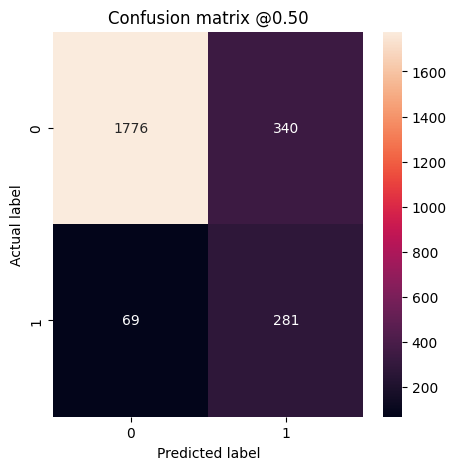

In [37]:
weighted_results = weighted_model.evaluate(X_test, y_test,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(y_test, test_predictions_weighted)

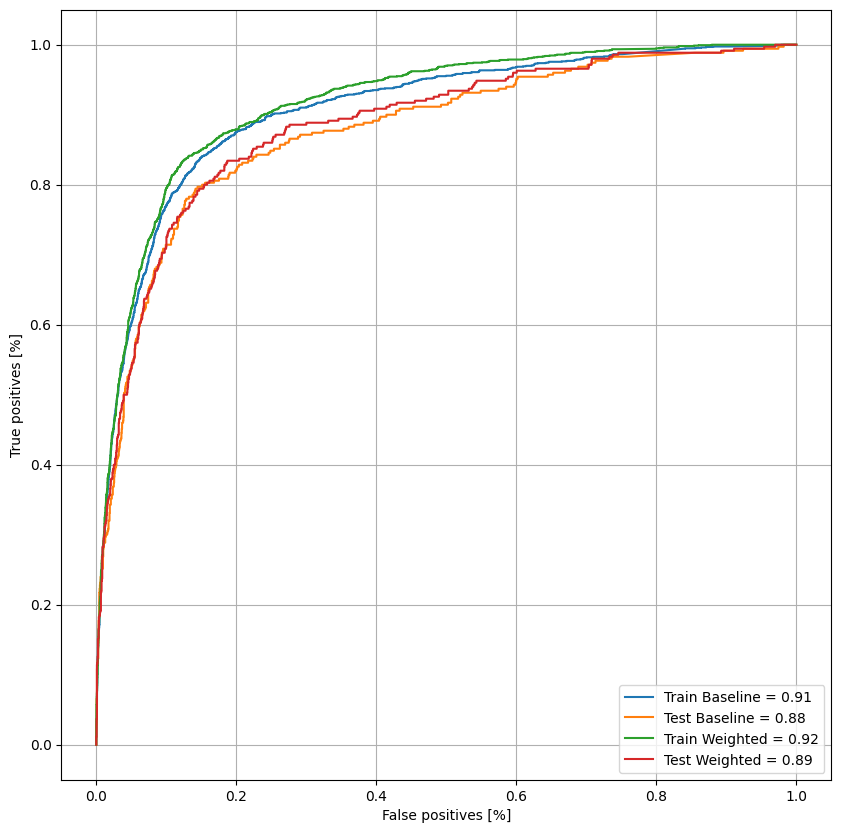

In [38]:
plot_roc("Train Baseline", y_train, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", y_test, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", y_train, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", y_test, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right');

# Random Forest Classifier

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=2, test_size=.2)

In [40]:
# Fit Random Forest Classifier to our Training Data
rfc = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_rfc = rfc.predict(X_test)
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_rfc)*100,2))

Random Forest Classifier model accuracy(in %): 90.23


In [41]:
# Fit Extra Trees Classifier to our Training Data
etc = ExtraTreesClassifier(random_state=2, n_estimators=1000)
etc.fit(X_train, y_train)

# make prediction using our test data and model
y_pred_etc = etc.predict(X_test)
y_prob_etc = etc.predict_proba(X_test)[:, 1]

# Comparing our prediciton to response values
print('Extra Trees Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test, y_pred_etc)*100,2))

Extra Trees Classifier model accuracy(in %): 89.5


The area under the ROC curve is: 0.89


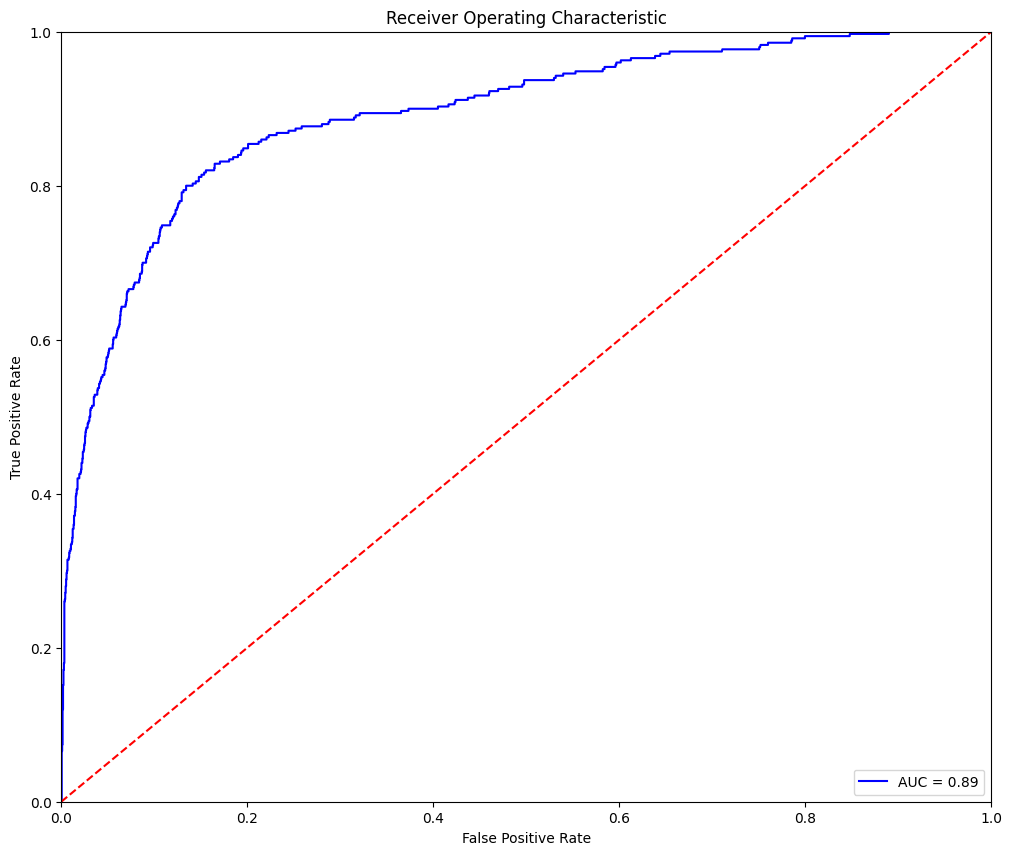

In [42]:
# Calculate ROC AUC for our best performing classifier, the Random Forest Classifier
roc_value = roc_auc_score(y_test, y_prob_rfc)
print('The area under the ROC curve is:', round(roc_value,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
# Calculate Log Loss
rfc_log_loss = log_loss(y_pred_rfc, y_prob_rfc, eps=1e-15)
print('Log Loss:', round(rfc_log_loss,2))

Log Loss: 0.16


## Stratifying Training Data 

Because the training data is so heavily skewed in the direction of the 'No purchase made' category, we must stratify our training data so that the ratio of training labels is equal. We use the stratified shuffle split package included in the Sci-kit learn library to achieve this.

In [44]:
X_train_stratified, X_test_stratified, y_train_stratified, y_test_stratified = train_test_split(X, y,stratify=y, test_size=.2, random_state=2, shuffle=True)

In [45]:
# Fit Gaussian Naive Bayes Classifier to our training data
gnb_stratified = GaussianNB() 
gnb_stratified.fit(X_train_stratified, y_train_stratified) 

# Make prediction using our test data and model
y_pred_stratified = gnb_stratified.predict(X_test_stratified) 

# Comparing our prediction to response values
print("Stratified Gaussian Naive Bayes model accuracy(in %):", round(metrics.accuracy_score(y_test_stratified, y_pred_stratified)*100,2))

Stratified Gaussian Naive Bayes model accuracy(in %): 83.78


In [46]:
# Fit Random Forest Classifier to our Training Data
rfc_stratified = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)
rfc_stratified.fit(X_train_stratified, y_train_stratified)
model = rfc_stratified.fit(X_train_stratified, y_train_stratified)

# make prediction using our test data and model
y_pred_rfc_stratified = rfc_stratified.predict(X_test_stratified)
y_prob_rfc_stratified = rfc_stratified.predict_proba(X_test_stratified)[:, 1]

# Comparing our prediciton to response values
print('Stratified Random Forest Classifier model accuracy(in %):', round(metrics.accuracy_score(y_test_stratified, y_pred_rfc_stratified)*100,2))

Stratified Random Forest Classifier model accuracy(in %): 89.5


The area under the ROC curve for stratified data is: 0.9


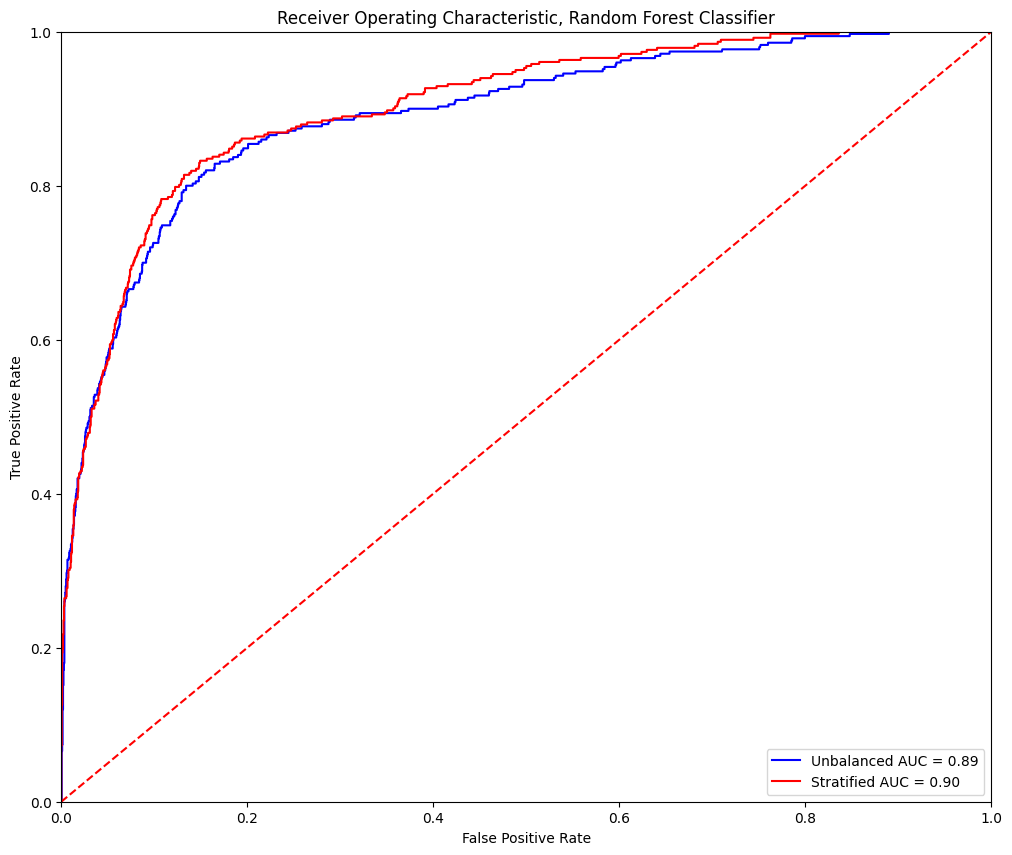

In [47]:
# Let us plot the ROC curve for the Random Forest Classifier for both the stratified data versus the unbalanced data.

#roc_value = roc_auc_score(y_test, y_prob_rfc)
#print('The area under the ROC curve for unbalanced data is:', round(roc_value,2))

roc_value_stratified = roc_auc_score(y_test_stratified, y_prob_rfc_stratified)
print('The area under the ROC curve for stratified data is:', round(roc_value_stratified,2))

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_rfc)
roc_auc = metrics.auc(fpr, tpr)

fpr_strat, tpr_strat, threshold_strat = metrics.roc_curve(y_test_stratified, y_prob_rfc_stratified)
roc_auc_strat = metrics.auc(fpr_strat, tpr_strat)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'Unbalanced AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

**Feature Importance**

To see if we can improve our model, let us track the feature importance of each of our features to see which features matter to the outcome of the prediction.

In [48]:
# 
importances = rfc_stratified.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc_stratified.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train_stratified.shape[1]):
    print("%d. Feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. Feature 8 (0.693368)
2. Feature 7 (0.086168)
3. Feature 5 (0.058875)
4. Feature 6 (0.042850)
5. Feature 4 (0.040776)
6. Feature 1 (0.022842)
7. Feature 0 (0.020969)
8. Feature 11 (0.017604)
9. Feature 3 (0.008162)
10. Feature 2 (0.005109)
11. Feature 9 (0.003008)
12. Feature 10 (0.000269)


In [49]:
# Generating a dataframe for our feature importance

col_names = pd.Series([col for col in X_train_stratified.columns])

importance_df = pd.DataFrame(importances)
importance_df.rename(columns={0:'Importance'}, inplace=True)
importance_df.set_index(col_names,inplace=True)

imp_sorted = importance_df.sort_values(by='Importance', ascending=False)
imp_sorted

,Importance
PageValues,0.693368
ExitRates,0.086168
ProductRelated_Duration,0.058875
BounceRates,0.042850
ProductRelated,0.040776
Administrative_Duration,0.022842
Administrative,0.020969
Visitor_Type_Returning_Visitor,0.017604
Informational_Duration,0.008162
Informational,0.005109


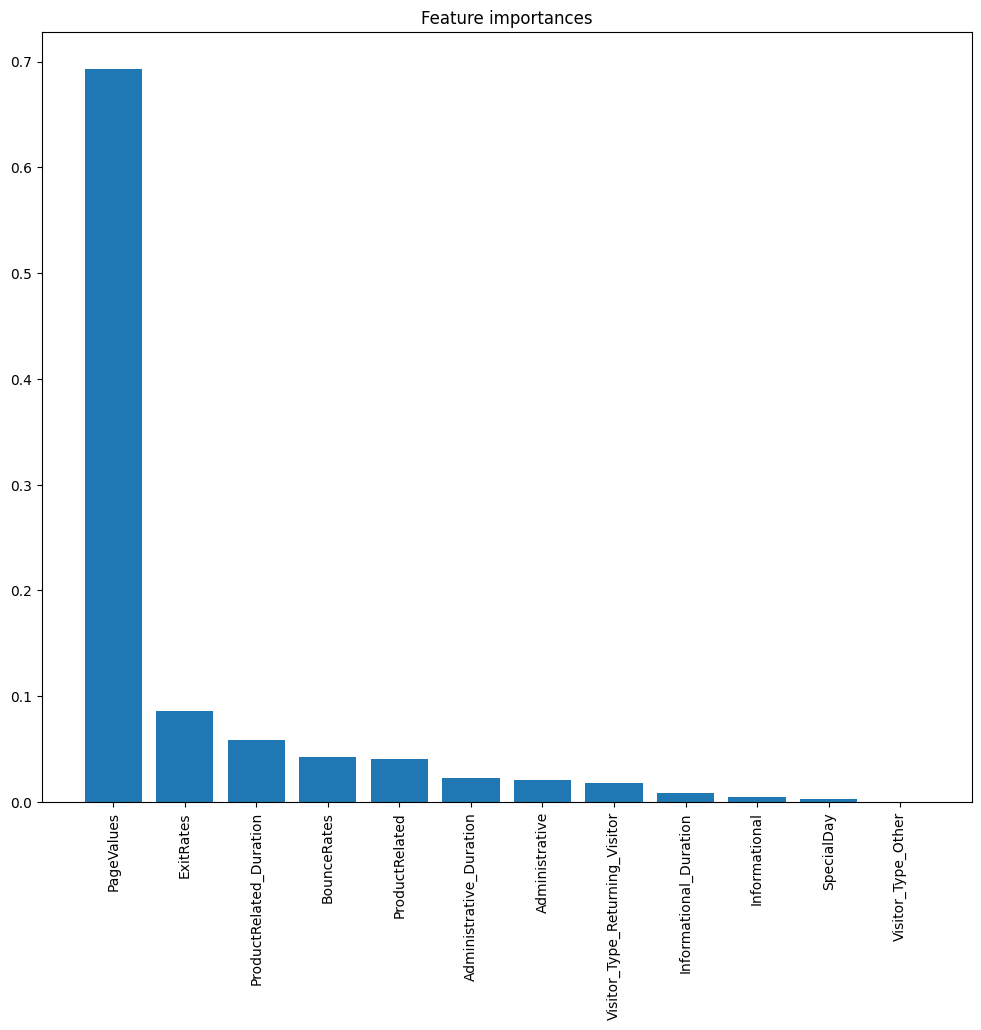

In [50]:
plt.title("Feature importances")
plt.bar(range(X_train_stratified.shape[1]),importances[indices])
plt.xticks(range(X_train_stratified.shape[1]), imp_sorted.index, rotation=90)
plt.xlim([-1, X_train_stratified.shape[1]])
plt.show()

In [51]:
# Creating simple model dataset
simple_model = shopping_clean_merged.drop(['Administrative_Duration','Administrative','Visitor_Type_Returning_Visitor','Informational_Duration','Informational','SpecialDay','Visitor_Type_Other'], axis=1)

# Split train and test data

X_simp = simple_model.drop('Revenue', axis=1)
y_simp = simple_model['Revenue']
cv = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=2)

In [52]:
clf = RandomForestClassifier(max_depth=5, random_state=2, n_estimators=750)

scores = cross_val_score(clf, X_simp, y_simp, cv=cv)
print("Average Accuracy of Classifier over 10-folds: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Average Accuracy of Classifier over 10-folds: 0.90 (+/- 0.01)


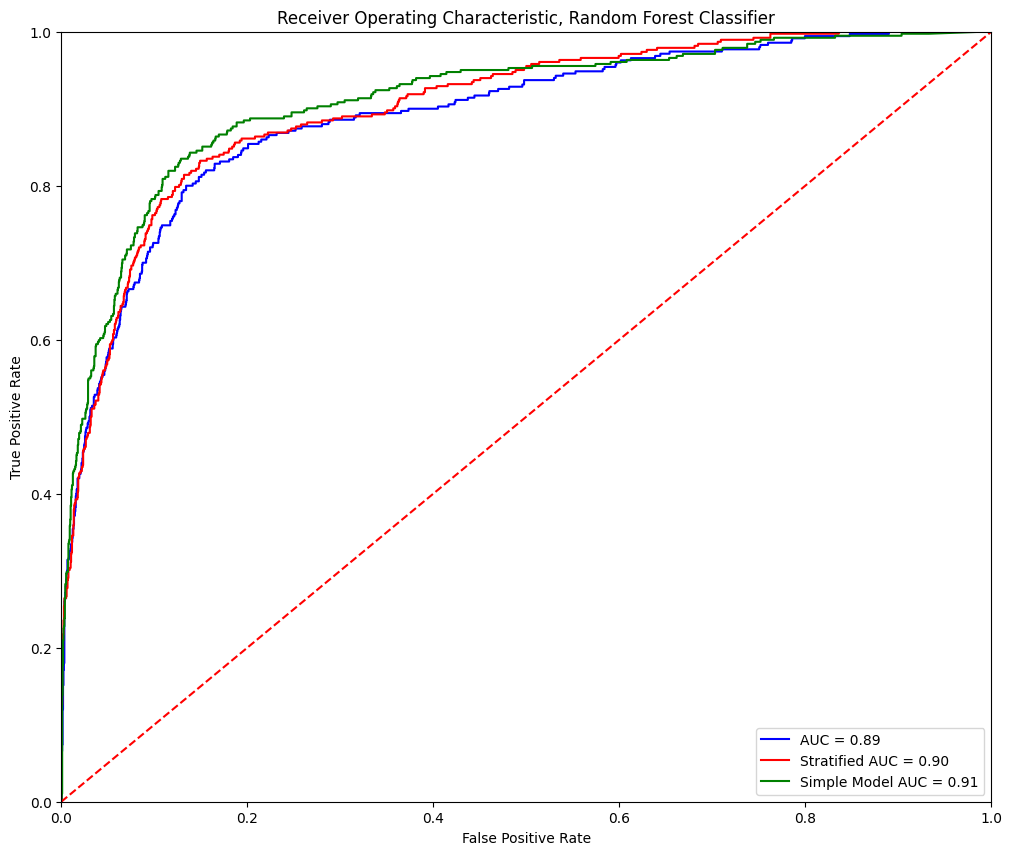

In [53]:
# Now lets compare our simplified model with our previous models:

X_train_simp, X_test_simp, y_train_simp, y_test_simp = train_test_split(X_simp, y_simp,stratify=y_simp, test_size=.2, shuffle=True, random_state=1)
clf_simp = RandomForestClassifier(max_depth=5, n_estimators=1000)

clf_simp.fit(X_train_simp,y_train_simp)
y_pred_simp = clf_simp.predict(X_test_simp)
y_prob_simp = clf_simp.predict_proba(X_test_simp)[:, 1]

fpr_simp, tpr_simp, threshold_strat = metrics.roc_curve(y_test_simp, y_prob_simp)
roc_auc_simp = metrics.auc(fpr_simp, tpr_simp)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.plot(fpr_simp, tpr_simp, 'g', label = 'Simple Model AUC = %0.2f' % roc_auc_simp)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

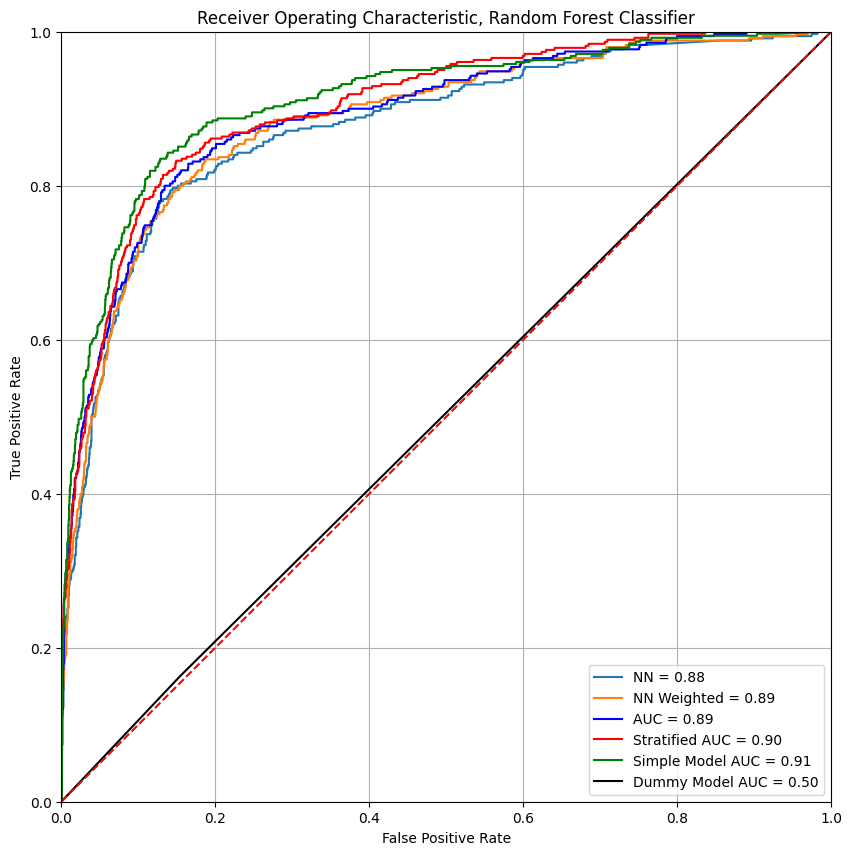

In [54]:
# Dummy Classifier

dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train,y_train)

y_pred_dummy = dummy_clf.predict(X_test)
y_prob_dummy = dummy_clf.predict_proba(X_test)[:, 1]

fpr_dummy, tpr_dummy, threshold_strat = metrics.roc_curve(y_test, y_prob_dummy)
roc_auc_dummy = metrics.auc(fpr_dummy, tpr_dummy)

# Plotting ROC Curve
plt.title('Receiver Operating Characteristic, Random Forest Classifier')

plot_roc("NN", y_test, test_predictions_baseline, color=colors[0], linestyle='--')
plot_roc("NN Weighted", y_test, test_predictions_weighted, color=colors[1], linestyle='--')


plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot(fpr_strat, tpr_strat, 'r', label = 'Stratified AUC = %0.2f' % roc_auc_strat)
plt.plot(fpr_simp, tpr_simp, 'g', label = 'Simple Model AUC = %0.2f' % roc_auc_simp)
plt.plot(fpr_dummy, tpr_dummy, 'k', label = 'Dummy Model AUC = %0.2f' % roc_auc_dummy)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()